### K-means

In [4]:
from pandas import DataFrame
Data = {'x': [25,34,22,27,33,33,31,22,35,34,67,54,57,43,50,57,59,52,65,47,49,48,35,33,44,45,38,43,51,46],   
        'y': [79,51,53,78,59,74,73,57,69,75,51,32,40,47,53,36,35,58,59,50,25,20,14,12,20,5,29,27,8,7]    }

In [6]:
df = DataFrame(Data, columns = ['x', 'y'])

In [7]:
df.shape

(30, 2)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
x    30 non-null int64
y    30 non-null int64
dtypes: int64(2)
memory usage: 608.0 bytes


In [9]:
df.describe()

,x,y
count,30.000000,30.000000
mean,42.633333,43.200000
std,12.220625,22.932284
min,22.000000,5.000000
25%,33.250000,25.500000
50%,43.500000,48.500000
75%,50.750000,58.750000
max,67.000000,79.000000


In [10]:
df.isna().sum()

x    0
y    0
dtype: int64

[[47.07142857 22.14285714]
 [38.75       61.625     ]]


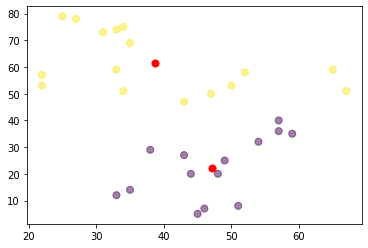

In [15]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2).fit(df)
centroids = kmeans.cluster_centers_
print(centroids)

plt.scatter(df['x'], df['y'], c=kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:,0], centroids[:,1], c='red', s=50)
plt.show()